In [5]:
%cd "C:/HolidayProjects/AIR-Quality-Prediction"

C:\HolidayProjects\AIR-Quality-Prediction


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
dataFrame = pd.read_csv('DataCollection/Real-Data/Real_Combine.csv')

In [8]:
dataFrame.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


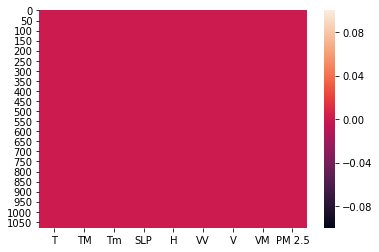

In [14]:
#Check For Null Values 
sns.heatmap(dataFrame.isnull())

In [12]:
#filling the values with mean values of the column
dataFrame=dataFrame.fillna(value = dataFrame['PM 2.5'].mean())

In [15]:
X = dataFrame.iloc[:,:-1] #independent feature
Y = dataFrame.iloc[:,-1]  #dependent feature (last column)

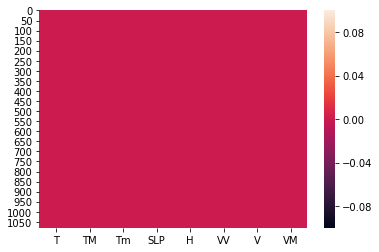

In [16]:
sns.heatmap(X.isnull())

In [18]:
Y.isnull()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1050    False
1051    False
1052    False
1053    False
1054    False
1055    False
1056    False
1057    False
1058    False
1059    False
1060    False
1061    False
1062    False
1063    False
1064    False
1065    False
1066    False
1067    False
1068    False
1069    False
1070    False
1071    False
1072    False
1073    False
1074    False
1075    False
1076    False
1077    False
1078    False
1079    False
Name: PM 2.5, Length: 1080, dtype: bool

In [20]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 9 columns):
T         1080 non-null float64
TM        1080 non-null float64
Tm        1080 non-null float64
SLP       1080 non-null float64
H         1080 non-null float64
VV        1080 non-null float64
V         1080 non-null float64
VM        1080 non-null float64
PM 2.5    1080 non-null float64
dtypes: float64(9)
memory usage: 76.0 KB


Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')


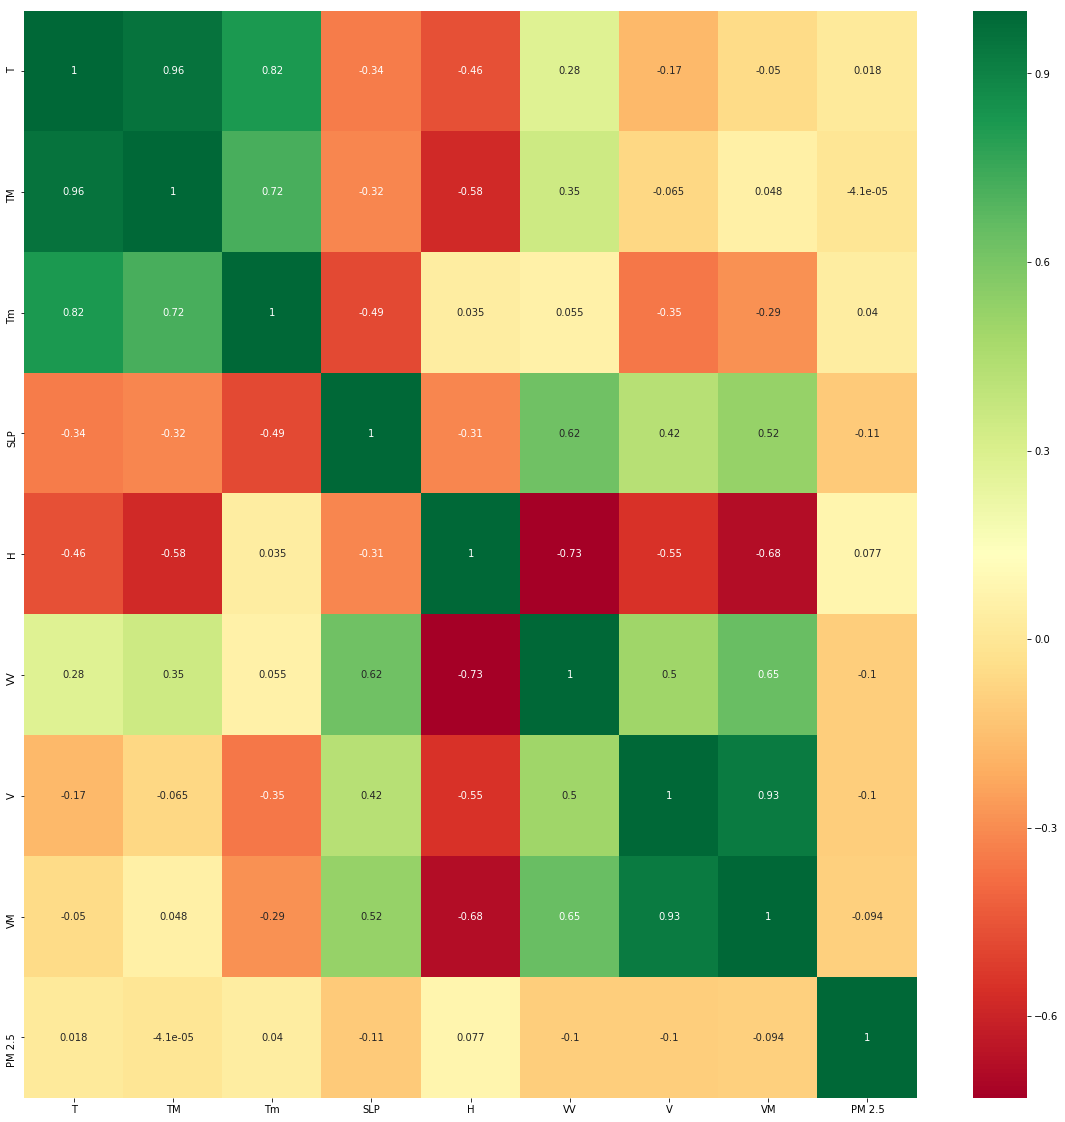

In [29]:
#Correlation with heatmap
correlation = dataFrame.corr()
topFeatures = correlation.index #descending order of features 
print(topFeatures)
plt.figure(figsize=(20,20))
sns.heatmap(dataFrame[topFeatures].corr(),annot=True,cmap="RdYlGn")

In [30]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
#print("model container is ready")
model.fit(X,Y)

model container is ready


C:\Users\PSK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

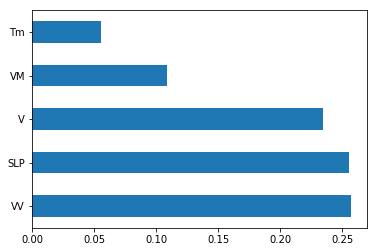

In [31]:
#Feature importance 
impFeature = pd.Series(model.feature_importances_, index=X.columns)
impFeature.nlargest(5).plot(kind='barh') # taking the top 5 feature
plt.show()

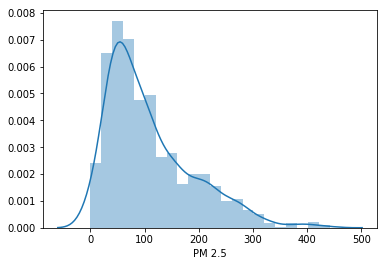

In [40]:
sns.distplot(Y)

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)


In [67]:
from sklearn.linear_model import LinearRegression


In [76]:
regressor=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=5,
         normalize=True)
print("regressor is ready")
regressor.fit(X_train,y_train)

regressor is ready


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=5, normalize=True)

In [77]:
regressor.coef_

array([ 26.90584538,  -1.49759998, -32.42061166,  -8.61910032,
         6.26915314,  36.56941033,  -5.16885138,   4.37496967])

In [78]:
regressor.intercept_

8247.433482153458

In [79]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_Train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.031237581283763083


In [80]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_Test, y_test)))

Coefficient of determination R^2 <-- on train set: -0.015116394087896001


In [81]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,Y,cv=5)

In [82]:
score.mean()

-0.017292724442352504

In [83]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
T,26.905845
TM,-1.497600
Tm,-32.420612
SLP,-8.619100
H,6.269153
VV,36.569410
V,-5.168851
VM,4.374970


In [84]:
prediction=regressor.predict(X_Test)

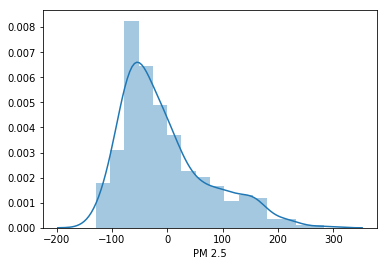

In [85]:
sns.distplot(Y_Test-prediction)

In [86]:
from sklearn import metrics

In [87]:
#print('MAE:', metrics.mean_absolute_error(Y_Test, prediction))
#print('MSE:', metrics.mean_squared_error(Y_Test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_Test, prediction)))

RMSE: 79.01780971482103


In [88]:
import pickle

In [89]:
# open a file, where you ant to store the data
file = open('regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(regressor, file)